# **Visualisations/ Statistical Tests**

**Purpose**

Provide reproducible exploratory data analysis, visualisations and statistical tests that directly validate the project hypotheses (hazardous status,size, miss-distance, velocity, observations). 

## Objectives

* Run focused EDA for features that inform hazard risk: diameter, miss distance, relative velocity, absolute magnitude, and observation count.
* Produce quality visuals (distribution plots, box/violin plots, scatter + trend lines).
* Execute hypothesis tests (two-sample tests, correlation tests) that are appropriate to each hypothesis and report effect sizes.
* Compare raw vs. log-transformed representations for skewed variables and recommend the representation for modelling.

## Inputs

* features.csv - Object-level features (includes raw and log1p columns).

## Outputs

* Visual Outputs:
    * Distribution plots (raw + log) for skewed features.
    * Box/violin plots comparing hazardous vs non-hazardous groups.
    * Scatter plots with trend lines (log axes where appropriate).
    * Correlation matrix heatmap (Spearman).
* Results summary: 
    * description of test used
    * statistics, p-value, effect size, conclusion.

## Completion Criteria

* Each hypothesis in the README has at least one visual and one statistical check recorded.
* Each hypothesis has a brief analysis
* Overall conclusions for next phase (modelling) 



---

# Change working directory

* We are assuming you will store the notebooks in a subfolder, therefore when running the notebook in the editor, you will need to change the working directory

We need to change the working directory from its current folder to its parent folder
* We access the current directory with os.getcwd()

In [1]:
import os
current_dir = os.getcwd()
current_dir

'c:\\Users\\mikee\\Desktop\\Near-Earth-Asteroid-Analysis\\jupyter_notebooks'

We want to make the parent of the current directory the new current directory
* os.path.dirname() gets the parent directory
* os.chir() defines the new current directory

In [2]:
os.chdir(os.path.dirname(current_dir))
print("You set a new current directory")

You set a new current directory


Confirm the new current directory

In [3]:
current_dir = os.getcwd()
current_dir

'c:\\Users\\mikee\\Desktop\\Near-Earth-Asteroid-Analysis'

# EDA

Workflow:
* Load Features, show head and basic description
* Check Summary statistics
* Create Visuals 
    * histogram + KDE and box/violin for each numeric feature (show raw and log features for skewed fields).
    * compare distribution by hazardous status
* Analyse distributions 
* Create correlation heatmap


Import Libraries

In [4]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import sklearn as sklearn
import warnings 
warnings.filterwarnings('ignore')
sns.set_style(style="whitegrid")

Load data and summary statistics for dataset

In [5]:
df = pd.read_csv('Data/processed/features.csv')
df.head()

,name,est_diameter_min,est_diameter_max,relative_velocity_mean,miss_distance_mean,miss_distance_min,absolute_magnitude_mean,hazardous,observations,est_diameter_range,est_diameter_mean,est_diameter_min_log1p,est_diameter_max_log1p,est_diameter_mean_log1p,est_diameter_range_log1p,relative_velocity_mean_log1p,miss_distance_mean_log1p,miss_distance_min_log1p,hazardous_enc
0,(1983 LC),0.342417,0.765667,60192.646491,1.847664e+07,1.033448e+07,19.45,True,2,0.423250,0.554042,0.294472,0.568529,0.440859,0.352943,11.005322,16.732018,16.150996,1
1,(1986 NA),0.284810,0.636854,51810.077045,7.005246e+07,7.005246e+07,19.85,False,1,0.352044,0.460832,0.250611,0.492776,0.379006,0.301618,10.855359,18.064755,18.064755,0
2,(1988 NE),0.402305,0.899580,22815.738845,6.506331e+07,6.506331e+07,19.10,False,1,0.497276,0.650942,0.338117,0.641633,0.501346,0.403647,10.035250,17.990871,17.990871,0
3,(1989 AZ),0.319562,0.714562,55184.046572,2.560466e+07,2.021980e+07,19.60,False,2,0.395000,0.517062,0.277300,0.539158,0.416776,0.332895,10.918447,17.058285,16.822173,0
4,(1991 GO),0.265800,0.594347,92501.896829,3.695728e+07,2.702563e+07,20.00,True,2,0.328547,0.430073,0.235704,0.466464,0.357726,0.284086,11.434995,17.425273,17.112296,1


In [6]:
df.shape, df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27423 entries, 0 to 27422
Data columns (total 19 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   name                          27423 non-null  object 
 1   est_diameter_min              27423 non-null  float64
 2   est_diameter_max              27423 non-null  float64
 3   relative_velocity_mean        27423 non-null  float64
 4   miss_distance_mean            27423 non-null  float64
 5   miss_distance_min             27423 non-null  float64
 6   absolute_magnitude_mean       27423 non-null  float64
 7   hazardous                     27423 non-null  bool   
 8   observations                  27423 non-null  int64  
 9   est_diameter_range            27423 non-null  float64
 10  est_diameter_mean             27423 non-null  float64
 11  est_diameter_min_log1p        27423 non-null  float64
 12  est_diameter_max_log1p        27423 non-null  float64
 13  e

((27423, 19), None)

In [7]:
df.describe().T 

,count,mean,std,min,25%,50%,75%,max
est_diameter_min,27423.0,1.390817e-01,3.744203e-01,0.000609,2.111324e-02,5.064715e-02,1.529519e-01,3.789265e+01
est_diameter_max,27423.0,3.109960e-01,8.372292e-01,0.001362,4.721065e-02,1.132505e-01,3.420109e-01,8.473054e+01
relative_velocity_mean,27423.0,4.682494e+04,2.335722e+04,646.320239,2.980754e+04,4.287564e+04,5.965196e+04,2.369901e+05
miss_distance_mean,27423.0,3.047301e+07,1.821554e+07,9316.925424,1.386736e+07,3.276135e+07,4.403119e+07,7.479865e+07
miss_distance_min,27423.0,1.770540e+07,1.724212e+07,6745.532516,4.121298e+06,1.145114e+07,2.710416e+07,7.479865e+07
absolute_magnitude_mean,27423.0,2.336167e+01,2.869921e+00,9.230000,2.120000e+01,2.360000e+01,2.550000e+01,3.320000e+01
observations,27423.0,3.312402e+00,3.408497e+00,1.000000,1.000000e+00,2.000000e+00,4.000000e+00,4.300000e+01
est_diameter_range,27423.0,1.719144e-01,4.628089e-01,0.000753,2.609741e-02,6.260332e-02,1.890590e-01,4.683789e+01
est_diameter_mean,27423.0,2.250388e-01,6.058247e-01,0.000985,3.416195e-02,8.194880e-02,2.474814e-01,6.131160e+01
est_diameter_min_log1p,27423.0,1.128281e-01,1.621026e-01,0.000609,2.089345e-02,4.940630e-02,1.423256e-01,3.660805e+00


Correlation Heatmap for numeric values

(Split by regular and log values for greater clarity)

<Axes: >

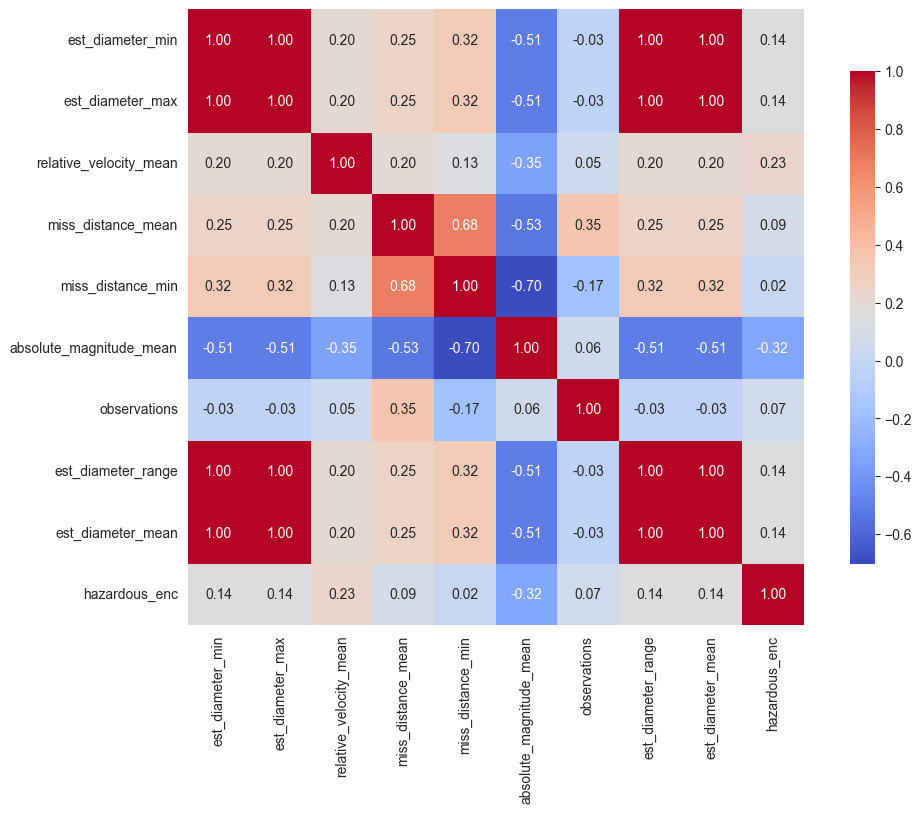

In [8]:
# Correlation Heatmap for numeric values (not including log columns)
log_columns = ['est_diameter_min_log1p','est_diameter_max_log1p','est_diameter_mean_log1p','est_diameter_range_log1p','relative_velocity_mean_log1p','miss_distance_mean_log1p','miss_distance_min_log1p']
df_numeric = df.select_dtypes(include=[np.number]).drop(columns=log_columns)
plt.figure(figsize=(12,8))
correlation_matrix = df_numeric.corr()
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', square=True, cbar_kws={"shrink": .8})

<Axes: >

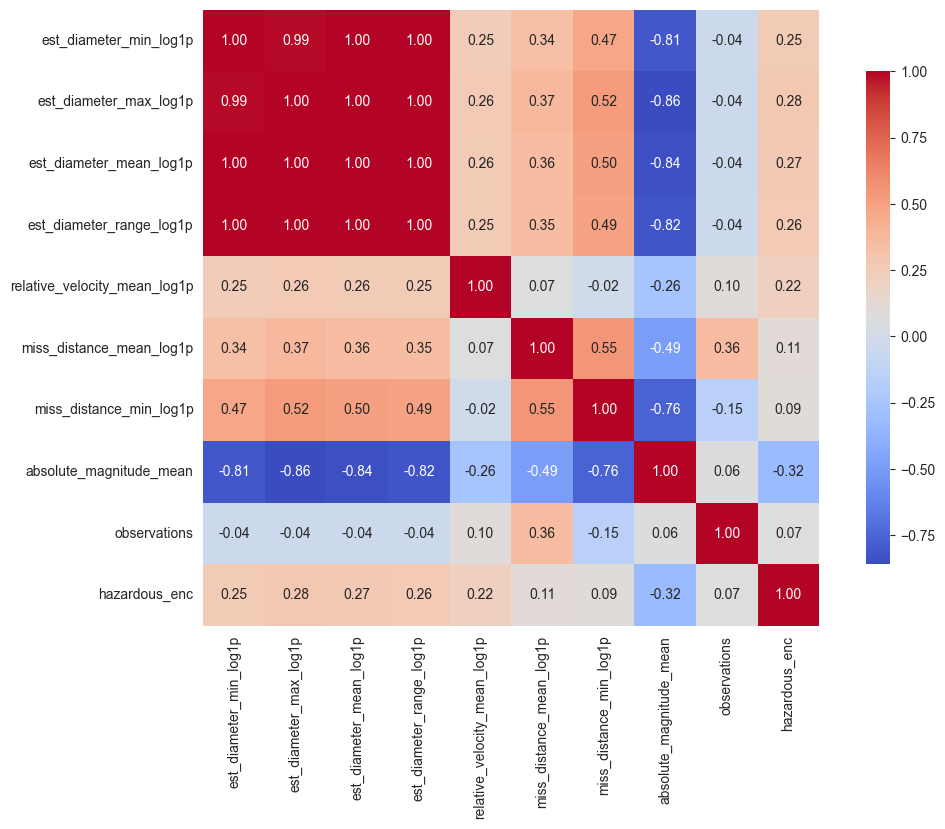

In [9]:
# Correlation Heatmap for numeric values for log columns (absolute magnitude and observations included for completeness)

log_columns = ['est_diameter_min_log1p','est_diameter_max_log1p','est_diameter_mean_log1p','est_diameter_range_log1p','relative_velocity_mean_log1p','miss_distance_mean_log1p','miss_distance_min_log1p','absolute_magnitude_mean','observations', 'hazardous_enc']
df_log = df[log_columns]
plt.figure(figsize=(12,8))
correlation_matrix = df_log.corr()
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', square=True, cbar_kws={"shrink": .8})

From these heatmaps we can see that the strongest correlations for our hazardous variable are for our log diameter variables (max, mean, range, min in that order) and absolute velocity.
However this is not quite the full picture. Though absolute magnitude appears to show (quite strong) negative correlations with almost every other variable this is because it is a inverted scale. In fact absolute_magnitude_mean in reality is strongly related to diameter values, miss_distance and also the strongest correlation with hazardous variable. This gives support to some of our hypotheses.
Interestingly observations has only a weak correlation to hazardous status and a small negative correlation (when inverted) to magnitude.

Next let us check the distribution of our original key numeric variables against our principle target variable, hazardous.

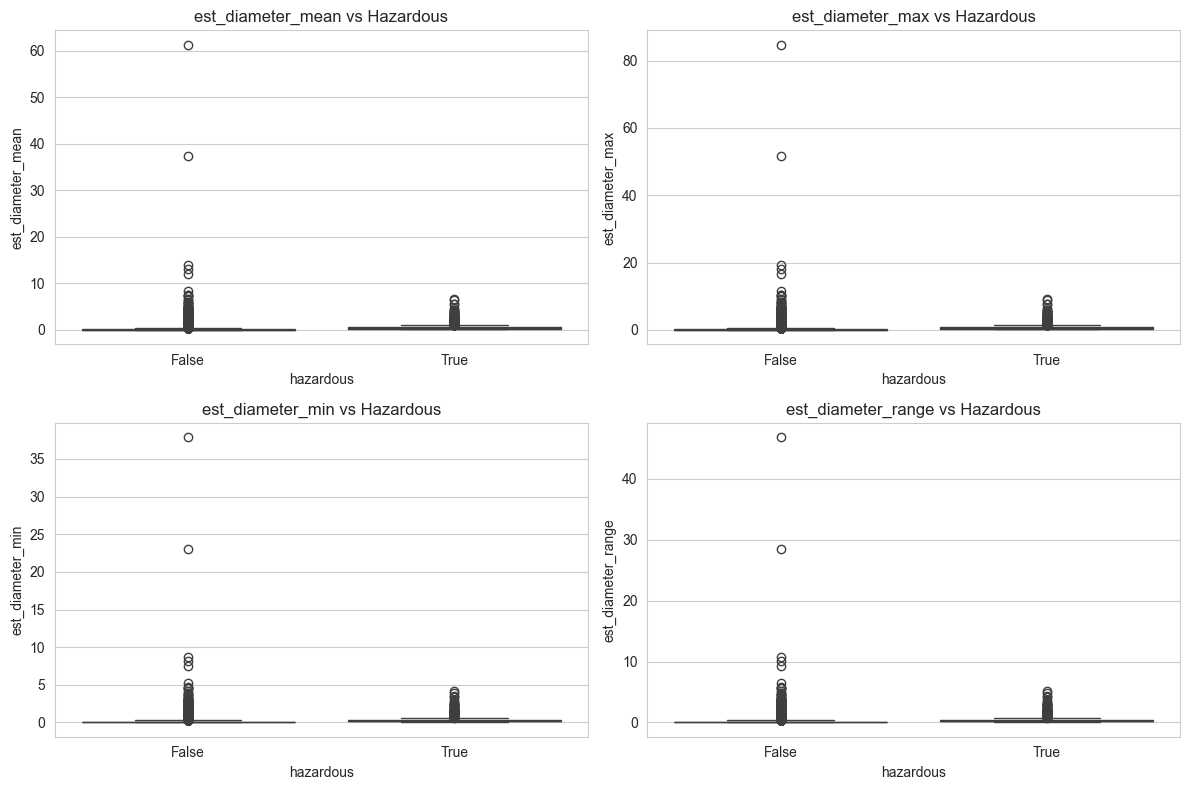

In [10]:
# -- Boxplots: Comparing Hazardous vs Non-Hazardous  (diameter) --
box_features = ["est_diameter_mean", 'est_diameter_max', 'est_diameter_min','est_diameter_range']
plt.figure(figsize=(12, 8))
for i, col in enumerate(box_features, 1):
    plt.subplot(2, 2, i)
    sns.boxplot(data=df, x="hazardous", y=col)
    plt.title(f"{col} vs Hazardous")
plt.tight_layout()
plt.show()

These show us that the distribution of the diameter classes is very skewed with very wide ranges - from a few meters to over 80k (for max values)

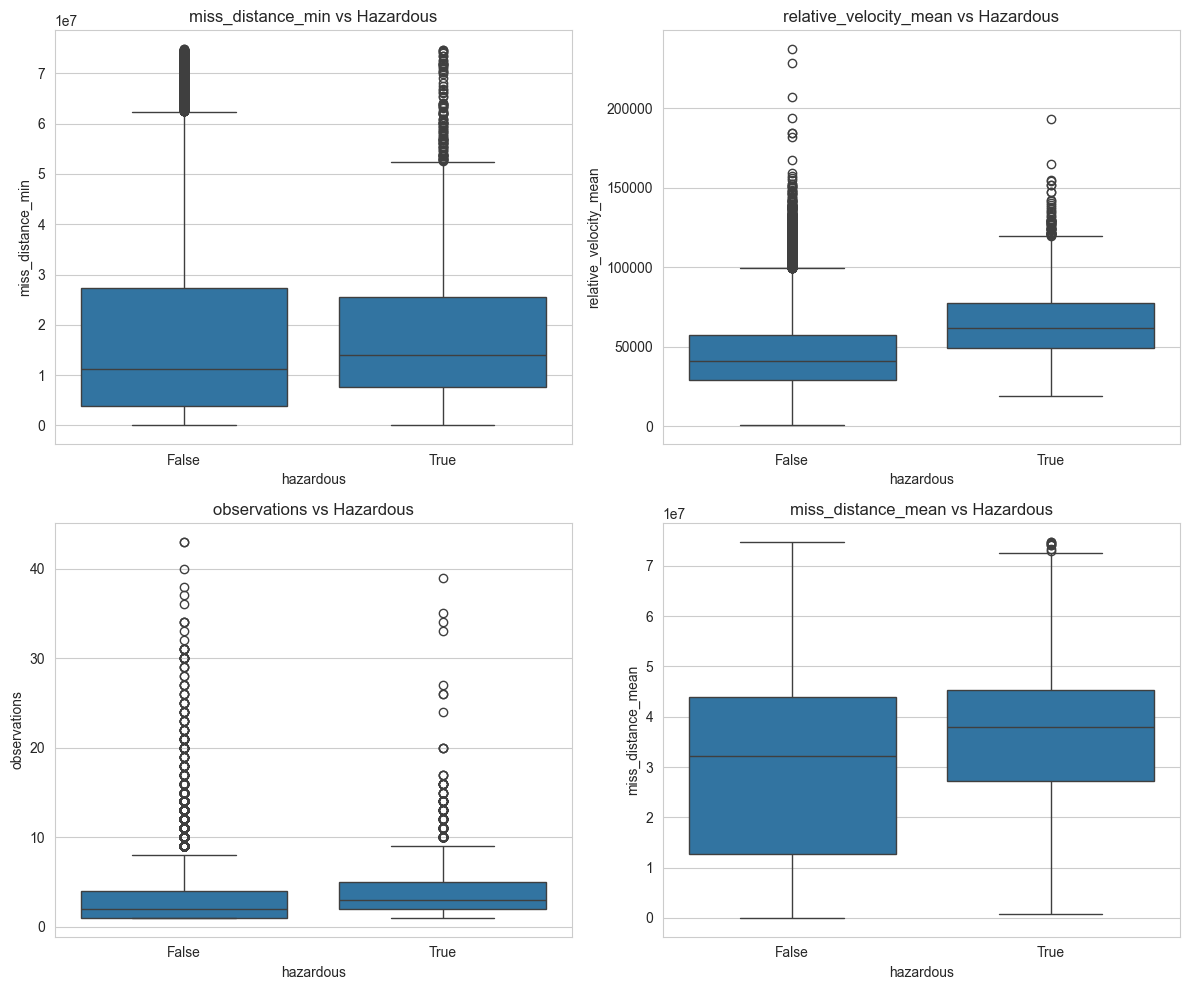

In [11]:

#boxplots for continuous numeric variables vs hazardous (not log transformed or diameter)
box_features2 = [ "miss_distance_min", "relative_velocity_mean", 'observations', 'miss_distance_mean']
plt.figure(figsize=(12, 10))
for i, col in enumerate(box_features2, 1):
    plt.subplot(2, 2, i)
    sns.boxplot(data=df, x="hazardous", y=col)
    plt.title(f"{col} vs Hazardous")
plt.tight_layout()
plt.show()

We can see from this the wide distribution of our data. There seems to be a small correlation between relative_velocity and hazardous status. There does not seem to be much correlation between miss distance and observations, though this may be distorted by the skewed data.

Next to examine magnitude we will use an inverted y-axis to get a clearer picture.

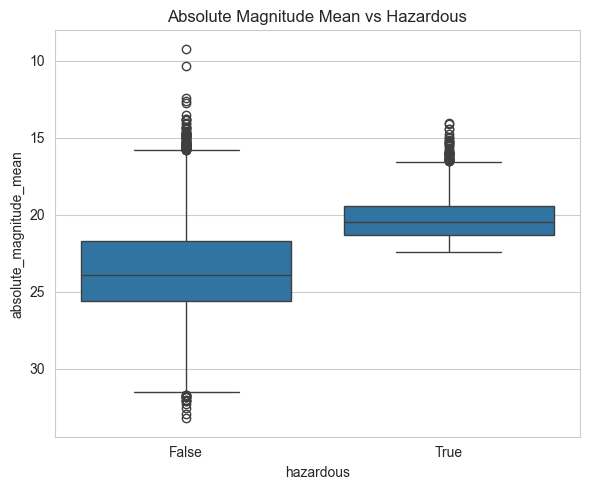

In [12]:
#To compensate for the inverted scale of absolute magnitude, we can invert the y-axis in the boxplot
plt.figure(figsize=(6, 5))
sns.boxplot(data=df, x="hazardous", y='absolute_magnitude_mean')
plt.gca().invert_yaxis()  # Invert the y-axis
plt.title("Absolute Magnitude Mean vs Hazardous")
plt.tight_layout()
plt.show()

This does show that brighter objects may be more likely to be classified as hazardous.
This may be because:
* Brighter objects are likely to be larger and closer
* It may be easier to define the properties of brighter objects and hence classify them
A combination of both could be true.

Finally let us check our logarithmic features, firstly diameter values.

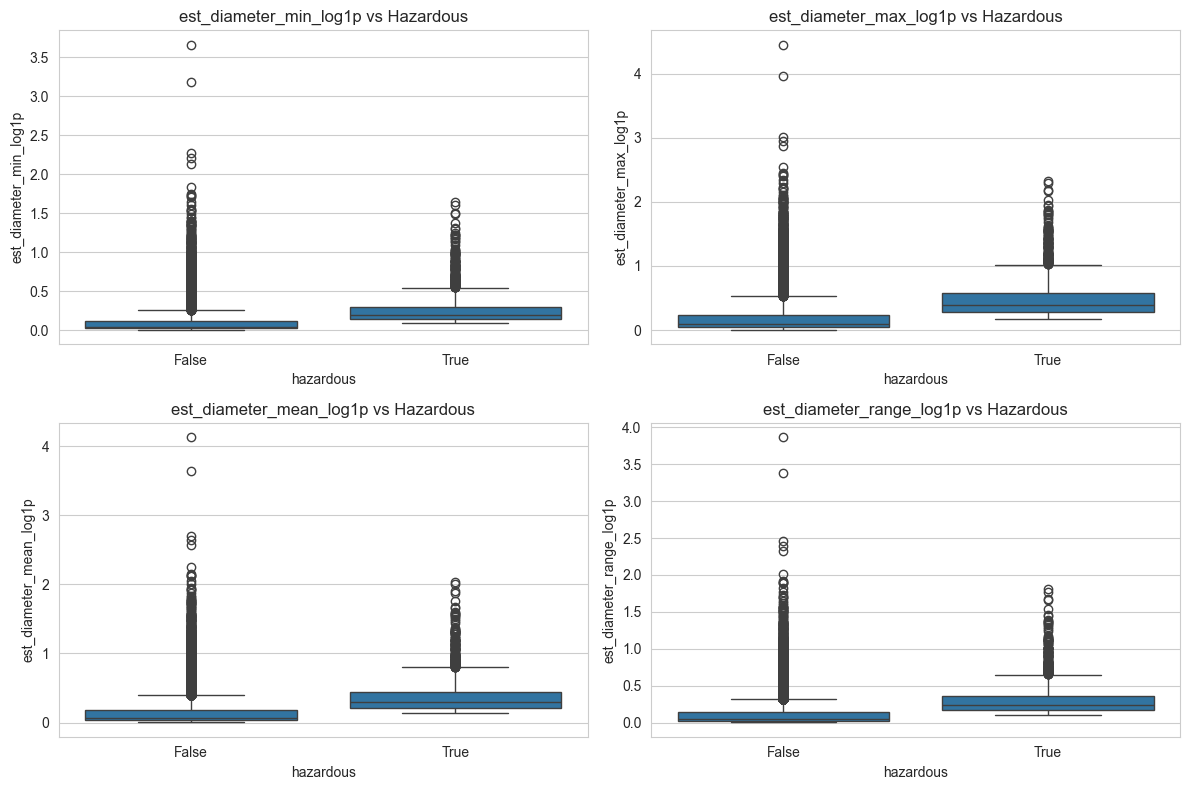

In [13]:
#-Boxplots: Comparing Hazardous vs Non-Hazardous  (diameterlog features) --
log_box_features = ['est_diameter_min_log1p','est_diameter_max_log1p','est_diameter_mean_log1p','est_diameter_range_log1p']
plt.figure(figsize=(12, 8))
for i, col in enumerate(log_box_features, 1):
    plt.subplot(2, 2, i)
    sns.boxplot(data=df, x="hazardous", y=col)
    plt.title(f"{col} vs Hazardous")
plt.tight_layout()
plt.show()

From this we can see that there is a small but noticeable pattern - hazardous asteroids are likely to have higher than average diameters than those not considered hazardous.

Finally we can check our remaining logarithmic features.


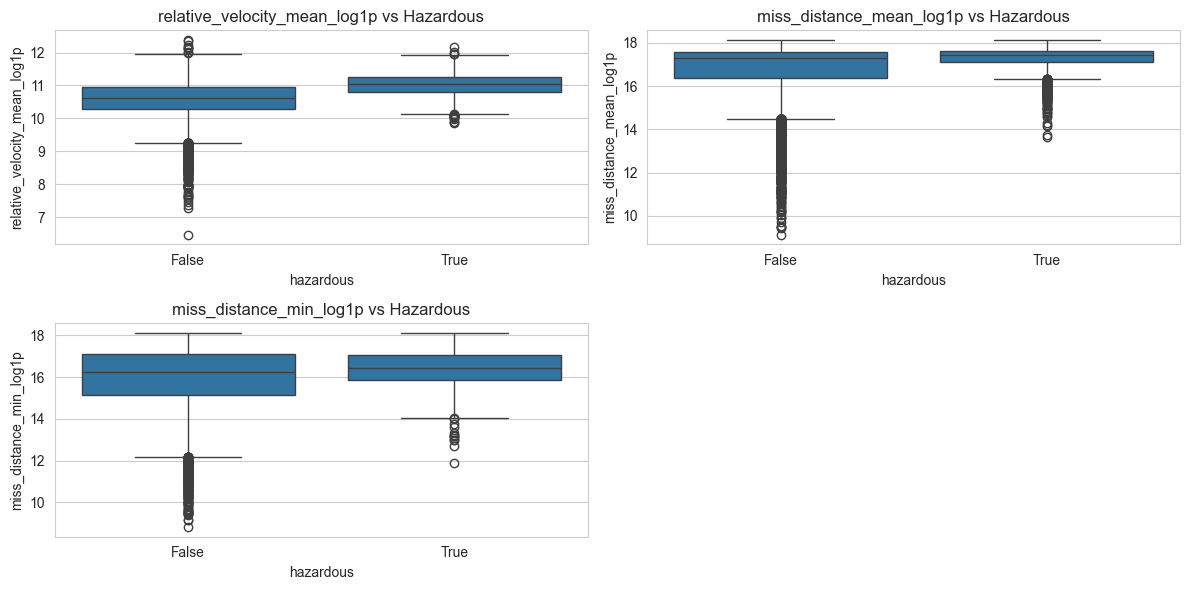

In [14]:
# Boxplots: Comparing Hazardous vs Non-Hazardous  (other log features) --
log_box_features2 = ['relative_velocity_mean_log1p','miss_distance_mean_log1p','miss_distance_min_log1p']
plt.figure(figsize=(12, 6))
for i, col in enumerate(log_box_features2, 1):
    plt.subplot(2, 2, i)
    sns.boxplot(data=df, x="hazardous", y=col)
    plt.title(f"{col} vs Hazardous")
plt.tight_layout()
plt.show()

Again we see no real connection between miss distance and hazardous status, with a small correlation between higher velocities and hazard status.

To summarise:
* Features with some correlation to hazard status
    * absolute_magnitude
    * diameter (all measures)
    * relative_velocity
* Features with no obvious or apparent correlation to hazard status
    * miss_distance ( across all values, with slight variations)
    * observations

This concludes the EDA section, next we will look at statistical tests to examine our hypotheses.

---

# Statistical Tests and Visualisations

## Hypotheses

Before proceeding with tests I will recap our main hypotheses.

* Physical / Predictice
    * **Larger asteroids** (greater estimated diameters) are more likely to be classified as hazardous.
    * **Closer approaches to Earth** (smaller miss distances) are associated with a higher likelihood of hazard classification.
    * **Higher relative velocities** correlates with greater hazard potential due to increased impact energy.
    * **Absolute magnitude** (brightness) inversely correlates with hazard level — brighter (larger) objects are more likely to be hazardous. 
    * A combination of **size**, **speed**, and **miss distance** can effectively predict hazard status.
* Observational
    * NEOs with more recorded **observations** tend to be closer and larger.
    * **Potentially hazardous asteroids** are observed more frequently due to higher monitoring priority.
    * There is a positive correlation between the number of **observations** and an asteroid’s **brightness** or **size**.


#### Hypothesis - Larger Asteroids are more likely to be classified as hazardous

* H<sub>0</sub>: There is no significant correlation between diameter and hazard status. (pval => 0.05)
* H<sub>a</sub>: There is a significant correlation between diameter and hazard status. (pval < 0.05>)


From our correlations and box plots we have seen that there is some support for this.
As we have a number of features measuring diameter, both in original and log scales, I will first look at maximum and mean diameter, as these had the highest measure of correlation with hazard status.

First I will check the normality of our selected features.

In [15]:
# check for normality
import pingouin as pg
df_test = df[['est_diameter_mean_log1p',"est_diameter_max_log1p"]]
pg.normality(df_test,alpha=0.05)

,W,pval,normal
est_diameter_mean_log1p,0.678944,8.649862e-113,False
est_diameter_max_log1p,0.710070,4.598012e-110,False


As the data is not normally distributed, even with log scaling, I will use a Mann-Whitney test.

In [16]:
#Mann-Whitney U Test for significant differences between hazardous and non-hazardous groups
#for size (est_diameter_mean_log1p and est_diameter_max_log1p) 
from scipy.stats import mannwhitneyu

cols_to_test = ["est_diameter_max_log1p", "est_diameter_mean_log1p"]

# Separate groups
haz = df[df["hazardous_enc"] == 1]
non_haz = df[df["hazardous_enc"] == 0]

# Perform Mann–Whitney U test for each feature
results = []
for col in cols_to_test:
    stat, p = mannwhitneyu(haz[col], non_haz[col], alternative='two-sided')
    results.append({
        "Feature": col,
        "Hazardous_Median": haz[col].median(),
        "NonHazardous_Median": non_haz[col].median(),
        "U_Statistic": stat,
        "p_Value": p,
        "Significant (α=0.05)": "Yes" if p < 0.05 else "No"
    })

# Create a summary table
results_df = pd.DataFrame(results)

# Display neatly formatted table
print("\nMann–Whitney U Test Results:\n")
print(results_df.to_string(index=False))

    



Mann–Whitney U Test Results:

                Feature  Hazardous_Median  NonHazardous_Median  U_Statistic  p_Value Significant (α=0.05)
 est_diameter_max_log1p          0.394137             0.093658   46705736.5      0.0                  Yes
est_diameter_mean_log1p          0.299791             0.068636   46705696.5      0.0                  Yes


From this we can see that there is a significant statistical difference between hazardous and non-hazardous groups in terms of diameter, with a high level of confidence (p=0).

Next I will do a visual check.

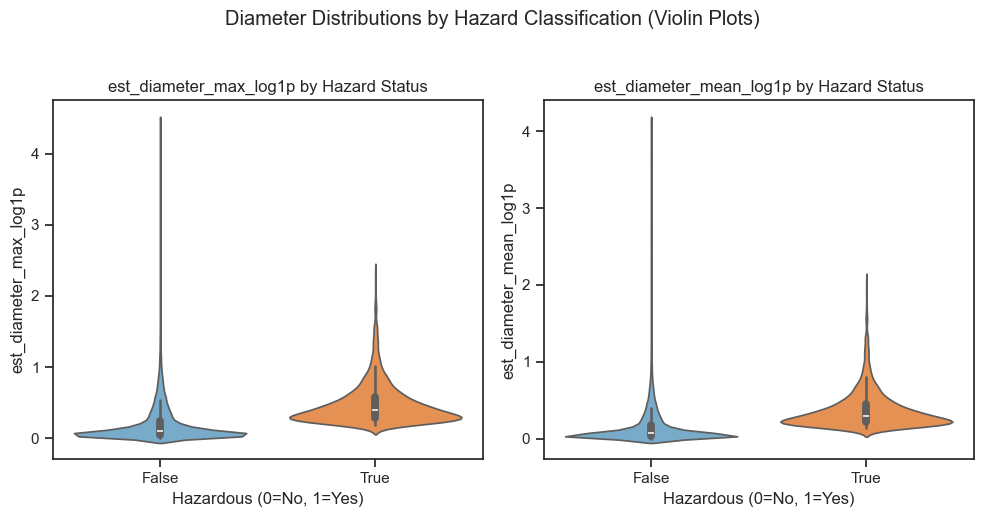

In [17]:
# Violin Plots for Diameter Features by Hazard Status
n_cols = len(cols_to_test)
plt.figure(figsize=(5 * n_cols, 5))

for i, col in enumerate(cols_to_test, 1):
    plt.subplot(1, n_cols, i)
    sns.violinplot(
        data=df, x="hazardous", y=col, inner="box", palette=["#6baed6", "#fd8d3c"]
    )
    plt.title(f"{col} by Hazard Status")
    plt.xlabel("Hazardous (0=No, 1=Yes)")
    plt.ylabel(col)

plt.suptitle("Diameter Distributions by Hazard Classification (Violin Plots)", y=1.03)
plt.tight_layout()
plt.show()

As our log scaled features were already based on aggregated versions of the original data there is no need to test the original versions. 
Further testing could be done with individual observations, but that is not in the scope of this project.
Finally we can reject the null hyothesis and conclude that larger diameter significantly contributes to hazard staus.

#### Hypothesis - Closer approaches to Earth (smaller miss distances) are associated with a higher likelihood of hazard classification.

* H<sub>0</sub>: There is no significant correlation between miss_distance and hazard status. (pval => 0.05)
* H<sub>a</sub>: There is a significant correlation between miss_distance and hazard status. (pval < 0.05>)


Again I will use our log scaled features to test this hypothesis and first do a normality check.

In [18]:
#check for normality
df_test = df[['miss_distance_mean_log1p',"miss_distance_min_log1p"]]
pg.normality(df_test,alpha=0.05)

,W,pval,normal
miss_distance_mean_log1p,0.804026,6.541227e-100,False
miss_distance_min_log1p,0.941366,9.008696e-72,False


As the data is not normally distributed I will again use a Mann-Whitney test. However for testing we need to take into account that lower miss distances values = closer so we are in effect dealing with an inverted scale. We can deal with this in to ways:
* Create a proximity score inverting the scale of miss_distance
* invert the interpretation

I have used the first approach to stay consistent with hypothesis. However I will also test the original values to maintain transparency.

In [32]:
#Mann-Whitney U Test for significant differences between hazardous and non-hazardous groups
#for miss_distance (miss_distance_mean_log1p and miss_distance_min_log1p) 

df["proximity_score_min"] =  1/ df["miss_distance_min_log1p"]
df["proximity_score_mean"] = 1 / df["miss_distance_mean_log1p"]
cols_to_test_distance = ["proximity_score_mean", "proximity_score_min", "miss_distance_mean_log1p", "miss_distance_min_log1p"]

# Separate groups
haz = df[df["hazardous_enc"] == 1]
non_haz = df[df["hazardous_enc"] == 0]

# Perform Mann–Whitney U test for each feature
results = []
for col in cols_to_test_distance:
    stat, p = mannwhitneyu(haz[col], non_haz[col], alternative='two-sided')
    results.append({
        "Feature": col,
        "Hazardous_Median": haz[col].median(),
        "NonHazardous_Median": non_haz[col].median(),
        "U_Statistic": stat,
        "p_Value": p,
        "Significant (α=0.05)": "Yes" if p < 0.05 else "No"
    })

# Create a summary table
results_df = pd.DataFrame(results)

# Display neatly formatted table
print("\nMann–Whitney U Test Results:\n")
print(results_df.to_string(index=False))


Mann–Whitney U Test Results:

                 Feature  Hazardous_Median  NonHazardous_Median  U_Statistic      p_Value Significant (α=0.05)
    proximity_score_mean          0.057293             0.057850   22240612.0 1.056897e-48                  Yes
     proximity_score_min          0.060791             0.061619   23580850.0 1.409928e-27                  Yes
miss_distance_mean_log1p         17.453990            17.286158   32627638.0 1.056897e-48                  Yes
 miss_distance_min_log1p         16.449846            16.228839   31287400.0 1.409928e-27                  Yes


These are interesting results as all show a significant positive result and pval significantly lower than .05, particularly for mean. 
Implication - there is a significant correlation between miss distance and hazard status but not in support of our hypothesis  e.g. lower miss distance does not necessarily correlate to hazard status.

As the result of this test is somewhat ambiguous we will run a spearman test, with miss distance (testing proximity score is redundant in this case).

In [ ]:
# Spearman Rank Correlation: Miss Distance vs Hazardous Status
from scipy.stats import spearmanr

# Consider adjusting as all four relate to miss distance
# Scale direction helper for clearer interpretation
cols_to_test_distance = ["miss_distance_mean_log1p", "miss_distance_min_log1p"]
scale = {
    # "proximity_score_mean": "higher=closer",
    # "proximity_score_min": "higher=closer", # (commented out as not used in this analysis)
    "miss_distance_mean_log1p": "higher=farther",
    "miss_distance_min_log1p": "higher=farther",
}

rows = []
for col in cols_to_test_distance:
    # Pairwise dropna for N
    pair = df[[col, "hazardous_enc"]].dropna()
    rho, p = spearmanr(pair[col], pair["hazardous_enc"])

    # Interpretation based on scale direction
    # if scale[col] == "higher=closer":
    #     direction = "Positive ρ → closer = more hazardous" if rho > 0 else (
    #                 "Negative ρ → closer = less hazardous" if rho < 0 else "No association")
    # else:  # higher=farther (commented out as not used in this analysis)
    direction = "Negative ρ → closer = more hazardous" if rho < 0 else (
                "Positive ρ → closer = less hazardous" if rho > 0 else "No association")

    rows.append({
        "Feature": col,
        "N": len(pair),
        "Spearman_rho": rho,
        "p_value": p,
        "Interpretation": direction
    })
#Format to display neatly
res = pd.DataFrame(rows).sort_values("Feature")
res["Spearman_rho"] = res["Spearman_rho"].round(3)
res["p_value"] = res["p_value"].apply(lambda x: f"{x:.3e}")
res  



,Feature,N,Spearman_rho,p_value,Interpretation
0,miss_distance_mean_log1p,27423,0.089,6.944e-49,Positive ρ → closer = less hazardous
1,miss_distance_min_log1p,27423,0.066,1.243e-27,Positive ρ → closer = less hazardous


This is more conclusive - closer objects are less likely to be classified as hazardous.
We can accept our null hypothesis and suggest why this may be:
* Closer objects may have more stable and predictable orbits
* Closer objects my be easier to observe and classify

Finally we can visualise this pattern.

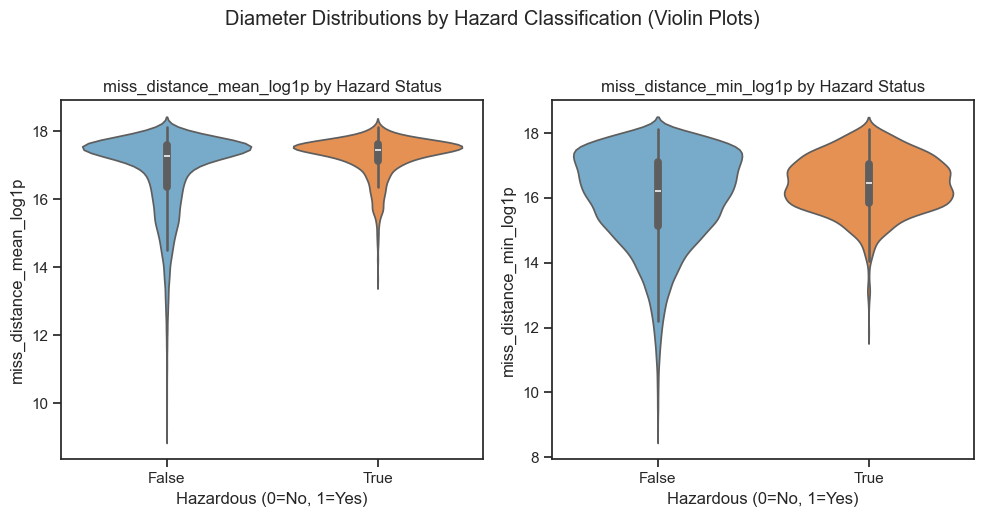

In [34]:
cols_to_test_distance = ["miss_distance_mean_log1p", "miss_distance_min_log1p"]
n_cols = len(cols_to_test_distance)
plt.figure(figsize=(5 * n_cols, 5))

for i, col in enumerate(cols_to_test_distance, 1):
    plt.subplot(1, n_cols, i)
    sns.violinplot(
        data=df, x="hazardous", y=col, inner="box", palette=["#6baed6", "#fd8d3c"]
    )
    plt.title(f"{col} by Hazard Status")
    plt.xlabel("Hazardous (0=No, 1=Yes)")
    plt.ylabel(col)

plt.suptitle("Diameter Distributions by Hazard Classification (Violin Plots)", y=1.03)
plt.tight_layout()
plt.show()

#### **Higher relative velocities** correlates with greater hazard potential

* H<sub>0</sub>: There is no significant correlation between mean_velocity and hazard status. (pval => 0.05)
* H<sub>a</sub>: There is a significant correlation between mean_velocity and hazard status. (pval < 0.05>)


Check normality - we will check both original and log values.


In [22]:
#check for normality
df_test = df[['relative_velocity_mean_log1p',"relative_velocity_mean"]]
pg.normality(df_test,alpha=0.05)

,W,pval,normal
relative_velocity_mean_log1p,0.976419,1.138645e-53,False
relative_velocity_mean,0.945265,2.610278e-70,False


Neither is normally distributed so we use Mann Whitney U again. No need to change scales as velocity is not an inverted scale.

In [38]:
#Mann-Whitney U Test for significant differences between hazardous and non-hazardous groups
#for relative_velocity (relative_velocity_mean_log1p)
cols_to_test_velocity = [ "relative_velocity_mean_log1p","relative_velocity_mean"]

# Separate groups
haz = df[df["hazardous_enc"] == 1]
non_haz = df[df["hazardous_enc"] == 0]

# Perform Mann–Whitney U test for each feature
results = []
for col in cols_to_test_velocity:
    stat, p = mannwhitneyu(haz[col], non_haz[col], alternative='two-sided')
    results.append({
        "Feature": col,
        "Hazardous_Median": haz[col].median(),
        "NonHazardous_Median": non_haz[col].median(),
        "U_Statistic": stat,
        "p_Value": p,
        "Significant (α=0.05)": "Yes" if p < 0.05 else "No"
    })

# Create a summary table
results_df = pd.DataFrame(results)

# Display neatly formatted table
print("\nMann–Whitney U Test Results:\n")
print(results_df.to_string(index=False))


Mann–Whitney U Test Results:

                     Feature  Hazardous_Median  NonHazardous_Median  U_Statistic  p_Value Significant (α=0.05)
relative_velocity_mean_log1p         11.036848            10.629494   41247047.0      0.0                  Yes
      relative_velocity_mean      62120.514020         41335.210018   41247047.0      0.0                  Yes


The test supports our hypothesis with a high degree of certainty p=o. There is a significantly higher velocity for objects classified as hazardous.

Let us check this visually.

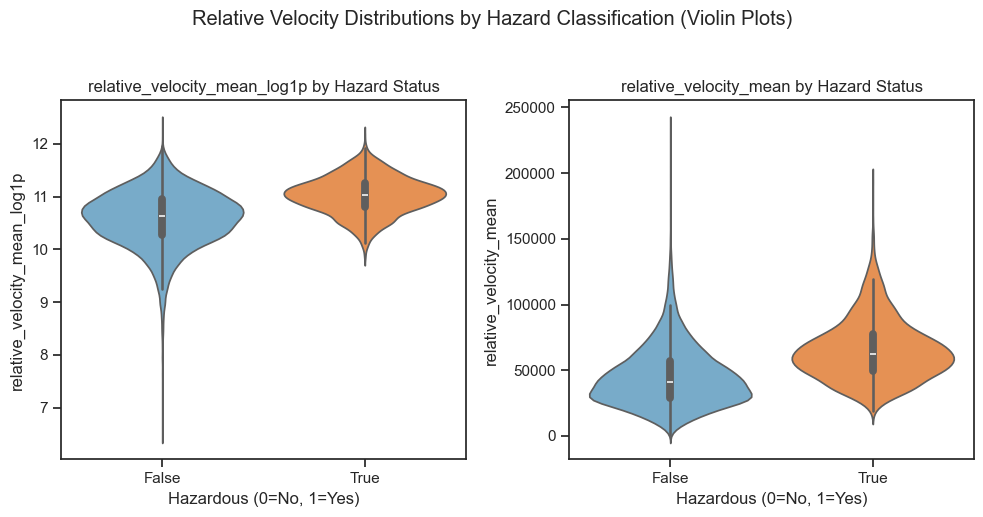

In [39]:
#Violin plots for relative_velocity

n_cols = len(cols_to_test_velocity)
plt.figure(figsize=(5 * n_cols, 5))

for i, col in enumerate(cols_to_test_velocity, 1):
    plt.subplot(1, n_cols, i)
    sns.violinplot(
        data=df, x="hazardous", y=col, inner="box", palette=["#6baed6", "#fd8d3c"]
    )
    plt.title(f"{col} by Hazard Status")
    plt.xlabel("Hazardous (0=No, 1=Yes)")
    plt.ylabel(col)

plt.suptitle("Relative Velocity Distributions by Hazard Classification (Violin Plots)", y=1.03)
plt.tight_layout()
plt.show()

The plots do not show a clear a picture as the testing. We can check a linear distrubiton to see if this shows a clearer picture.

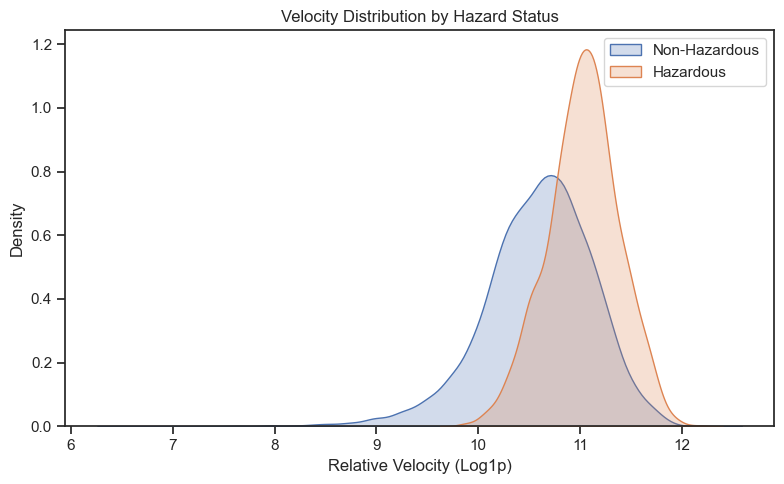

In [25]:
#KDE plot for relative_velocity_mean_log1p against hazardous
plt.figure(figsize=(8, 5))
sns.kdeplot(df[df["hazardous"] == 0]["relative_velocity_mean_log1p"], label="Non-Hazardous", shade=True)
sns.kdeplot(df[df["hazardous"] == 1]["relative_velocity_mean_log1p"], label="Hazardous", shade=True)
plt.title("Velocity Distribution by Hazard Status")
plt.xlabel("Relative Velocity (Log1p)")
plt.legend()
plt.tight_layout()
plt.show()

This perhaps more clearly shows the correlation between relative_velocity and hazard status.

#### **Absolute magnitude** (brightness) inversely correlates with hazard level — brighter (larger) objects are more likely to be hazardous. 

* H₀ (Null Hypothesis): There is no relationship between absolute magnitude (brightness) and hazard status.
* H₁ (Alternative Hypothesis): Absolute magnitude differs between hazardous and non-hazardous NEOs — specifically, hazardous NEOs tend to have lower absolute magnitudes (i.e., are brighter).

First check normalty of absolute_magnitude

In [26]:
df_test = df[['absolute_magnitude_mean']]
pg.normality(df_test,alpha=0.05)

,W,pval,normal
absolute_magnitude_mean,0.992144,2.027495e-35,False


Our distribution is not normal so we can proceed to Mann Whitney U test and as our data has an inverted scale we will also run a spearman correlation for added clarity.

In [27]:
#Mann-Whitney U Test for significant differences between hazardous and non-hazardous groups
#for absolute_magnitude_mean (absolute_magnitude_mean)
haz = df[df["hazardous_enc"] == 1]["absolute_magnitude_mean"]
nonhaz = df[df["hazardous_enc"] == 0]["absolute_magnitude_mean"]

results = []
stat, p = mannwhitneyu(haz, nonhaz, alternative="two-sided")
results.append({
        "Feature": "absolute_magnitude_mean",
        "Hazardous_Median": haz.median(),
        "NonHazardous_Median": nonhaz.median(),
        "U_Statistic": stat,
        "p_Value": p,
        "Significant (α=0.05)": "Yes" if p < 0.05 else "No"
    })
# Create a summary table
results_df = pd.DataFrame(results)

# Display neatly formatted table
print("\nMann–Whitney U Test Results:\n")
print(results_df.to_string(index=False))


Mann–Whitney U Test Results:

                Feature  Hazardous_Median  NonHazardous_Median  U_Statistic  p_Value Significant (α=0.05)
absolute_magnitude_mean             20.45                23.91    8162810.5      0.0                  Yes


The test shows a significant correlation with hazard status annd a strong confidence level - median Absolute_magnitude score for hazardous objects is significantly lower (i.e. they are brighter)
Next I will run a spearman test with an inverted absolute_magnitude scale (`brightness`)

In [ ]:

#Spearman correlation between absolute_magnitude_mean and hazardous
# Create brightness score (inverse of absolute magnitude)
df["brightness_score"] = -df["absolute_magnitude_mean"]

# --- Spearman Correlation (directional test) ---
rho, p_corr = spearmanr(df["brightness_score"], df["hazardous"])

print("Spearman Rank Correlation")
print(f"Spearman rho: {rho:.3f}")
print(f"p-value: {p_corr:.5f}")
print(f"Interpretation: {'Stronger correlation = brighter (lower mag) more hazardous' if rho > 0 else 'Weaker or opposite correlation'}\n")




Spearman Rank Correlation
Spearman rho: 0.329
p-value: 0.00000
Interpretation: Stronger correlation = brighter (lower mag) more hazardous



Our spearman test (Spearman rho > 0) confirms that brighter (lower absolute_magnitude) correlates to more hazardous asteroids.

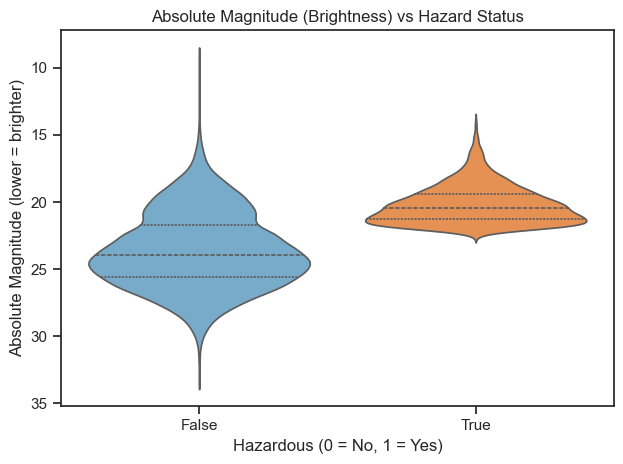

In [29]:
# --- Violin plot absolute magnitude vs hazardous ---
sns.violinplot(
    data=df, x="hazardous", y="absolute_magnitude_mean",
    inner="quartile", palette=["#6baed6", "#fd8d3c"]
)
plt.gca().invert_yaxis()  # Invert the y-axis as lower magnitude = brighter
plt.title("Absolute Magnitude (Brightness) vs Hazard Status")
plt.xlabel("Hazardous (0 = No, 1 = Yes)")
plt.ylabel("Absolute Magnitude (lower = brighter)")
plt.tight_layout()
plt.show()

Our statistical tests and visuals both mean we can reject the null hypothesis and conclude that brighter asteroids are likely to be classified as more hazardous.

#### * A combination of **size**, **speed**, and **miss distance** can effectively predict hazard status.

In [30]:
# sns.pairplot(
#     df,
#     vars=["est_diameter_mean", "miss_distance_min", "relative_velocity_mean"],
#     hue="hazardous",
#     diag_kind="kde",
#     height=4.2,
#     plot_kws={"alpha": 0.6}
# )
# plt.suptitle("Pairwise Relationships by Hazard Classification", y=1.02)
# plt.show()
# ['est_diameter_range', 'absolute_magnitude_mean', 'est_diameter_max', 'observations', 'miss_distance_mean', 'relative_velocity_mean', 'miss_distance_min', 'est_diameter_min', 'est_diameter_mean', 'hazardous', 'observations', 'miss_distance_mean', 'relative_velocity_mean', 'absolute_magnitude_mean']

#save for later use



---

NOTE

* You may add as many sections as you want, as long as it supports your project workflow.
* All notebook's cells should be run top-down (you can't create a dynamic wherein a given point you need to go back to a previous cell to execute some task, like go back to a previous cell and refresh a variable content)

---